In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers
from matplotlib import pyplot as plt

/var/folders/x2/cn8gtzzs3x90r0bq2nd7vg840000gn/T/ipykernel_842/2833413937.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-25 12:08:13.061207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ikanshgoyal/Desktop/digit/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, cu

In [10]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

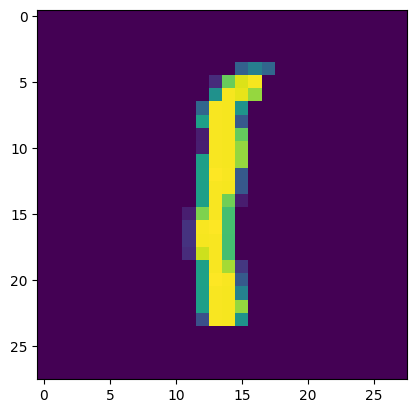

In [11]:
plt.imshow(x_train[2920])

In [12]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [13]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [21]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Dense(units=128, activation='softmax'))

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

    return model

def learning_rate_schedule(epoch, initial_learning_rate=0.003, decay_steps=10000, decay_rate=0.9):
    """Learning rate schedule function."""
    return initial_learning_rate * decay_rate**(epoch / decay_steps)

def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    # Define the Learning Rate Scheduler callback
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule)

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, 
                        validation_split=validation_split,
                        callbacks=[lr_scheduler])

    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

Epoch 1/50
12/12 [==============================] - 2s 118ms/step - loss: 1.8921 - accuracy: 0.5444 - val_loss: 0.5472 - val_accuracy: 0.8347 - lr: 0.0030
Epoch 2/50
12/12 [==============================] - 1s 80ms/step - loss: 0.5435 - accuracy: 0.8294 - val_loss: 0.3498 - val_accuracy: 0.8975 - lr: 0.0030
Epoch 3/50
12/12 [==============================] - 1s 82ms/step - loss: 0.4070 - accuracy: 0.8786 - val_loss: 0.2949 - val_accuracy: 0.9166 - lr: 0.0030
Epoch 4/50
12/12 [==============================] - 1s 86ms/step - loss: 0.3363 - accuracy: 0.9014 - val_loss: 0.2595 - val_accuracy: 0.9279 - lr: 0.0030
Epoch 5/50
12/12 [==============================] - 1s 79ms/step - loss: 0.2937 - accuracy: 0.9153 - val_loss: 0.2345 - val_accuracy: 0.9349 - lr: 0.0030
Epoch 6/50
12/12 [==============================] - 1s 92ms/step - loss: 0.2638 - accuracy: 0.9238 - val_loss: 0.2129 - val_accuracy: 0.9411 - lr: 0.0030
Epoch 7/50
12/12 [==============================] - 1s 79ms/step - loss: 0.

[0.07648049294948578, 0.9771999716758728]

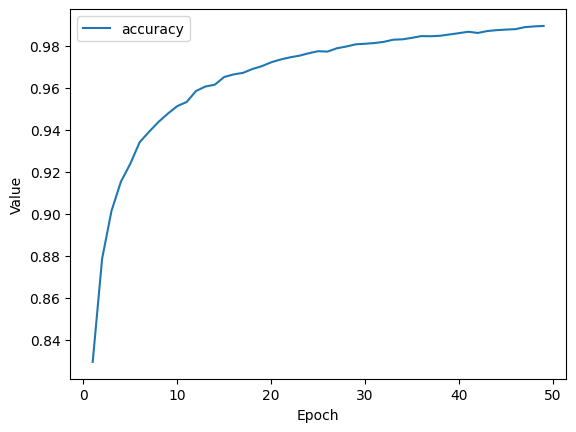

In [22]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

In [23]:
from PIL import Image

In [24]:
image_path = 'test.jpeg'  
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to match the model's input size
image_array = np.array(image).reshape((1, 28, 28, 1)).astype('float32') / 255.0

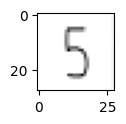

In [18]:
image_to_visualize = image_array.squeeze()

plt.figure(figsize=(1, 1))
plt.imshow(image_to_visualize, cmap='gray')
plt.show()

In [19]:
predictions = my_model.predict(image_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 305ms/step
Predicted class: 5


In [25]:
# Save the model
my_model.save('path_to_save_model.h5')